In [ ]:
"""
Initialization:

When loading initial conditions, pay attention to the units used. In this example, I am using the 'galaxy.txt' file to
import a 400-body toy model of a galaxy. The initial conditions in the file are written using non-SI units, in particular masses are
expressed in solar masses (2e30kg), distances in terms of a scale radius specific to the given galaxy and equal to 3.082e22 meters, and
velocities are given in 1e5m/s units.

When loading this data into the BODIES list, I convert each value into SI units to be consistent with the code.

An alternative approach would be to convert the code into new units, which would change values for things such as the gravitational
constant G and initial/final time t/T. The advantage of this approach is that python won't have to deal with extremely large numbers, 
leading to higher efficacy. However, the results won't be as intuitive to interpret as if they were given in SI units, meaning you will
probably need to convert back to SI at the end to analyze the data.

In this example, the 400-body galaxy isn't very computationally demanding, so I opted to convert everything into SI units.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Throughout the simulation, we will want to calculate and update the x,y,z,vx,vy,vz values of each body, so it's good to
#define a class with the given values
class body:
    def __init__(self, m, x, y, z, vx, vy, vz):
        self.m = m
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz

#We will also commonly need to calculate the distance between two bodies, given their x,y and z coordinates:
def distance(x1, x2, y1, y2, z1, z2):
    return ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(0.5)

#-------------------------------------------------------------------------------------------

G = 6.67e-11         #Gravitational constant
T = 86400*365*1e6        #Simulation end time in seconds, 1day = 86400s
t = 0                #Simulation start time, most commonly zero
dt = 86400*1e6           #Time step, smaller values give higher accuracy but longer computation time

M, XX, YY, ZZ, VX, VY, VZ = np.loadtxt('galaxy.txt', unpack=True)   #Initial conditions from file

#We won't use these lists after initialization, so make sure they have different names then the lists for storing coordinates
#during the simulation (e.g. XX instead of X, because I use X in the simulation)

#Here we load all the initial conditions into the BODIES list, utilizing the class 'body', and converting units into SI
BODIES = []
for i in range(len(M)):
    BODIES.append(body(M[i]*2e30, XX[i]*3.028e22, YY[i]*3.028e22, ZZ[i]*3.028e22, VX[i]*1e5, VY[i]*1e5, VZ[i]*1e5))

N = len(BODIES)  #This is the total number of bodies in the simulation, which we use in the next section

In [ ]:
"""
Below is the bulk of the code. Here we have three loops:

1. The first, while loop, goes over all time steps, from the starting time t until the stop time T, using the timestep dt.
2. For each moment in time, we want to calculate the acceleration of every body in the simulation. For this we use the first for loop,
which uses the indice i to cover all bodies from the list.
3. Each body gravitationally interacts with every other body (apart from itself, of course). To sum over all these interactions,
we use the second for loop, which goes over every i-j pair and updates the total acceleration of the i-th body.

Once the second loop finishes, we have the total components of acceleration of the i-th body. We then use those to update its
velocities, and then use those velocities to update its position. We append those position values to the designated X,Y,Z lists for
plotting, and then move on to the next body, until the first for loop finishes covering all of them.

When this is done, we just need to update the current time in the simulation and move on to the next timestep via the first while loop.
"""

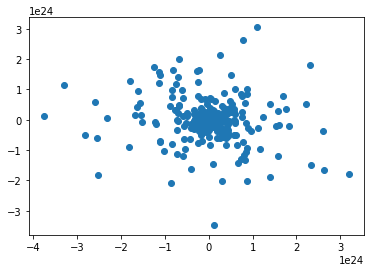

2.73972602739726


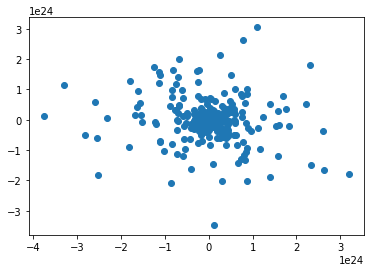

5.47945205479452


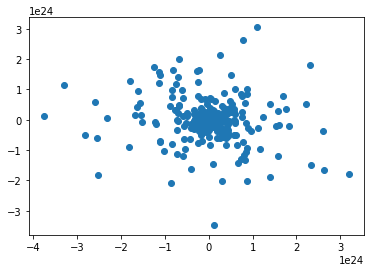

8.219178082191782


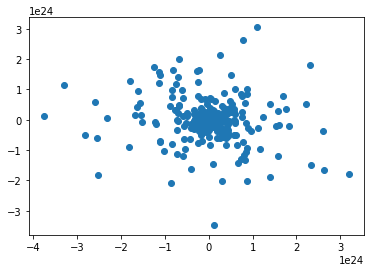

10.95890410958904


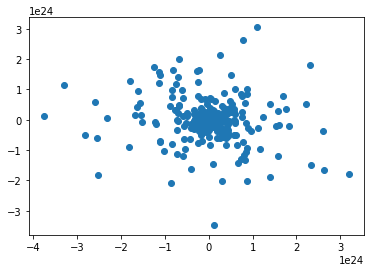

13.698630136986301


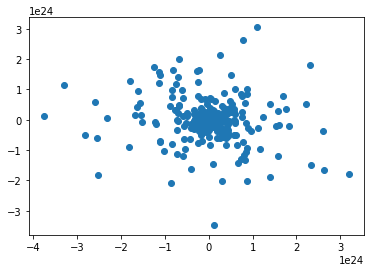

16.438356164383563


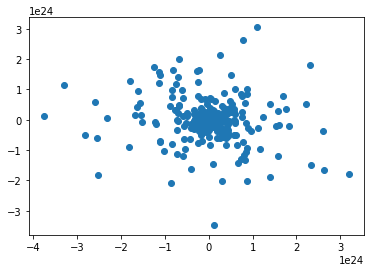

19.17808219178082


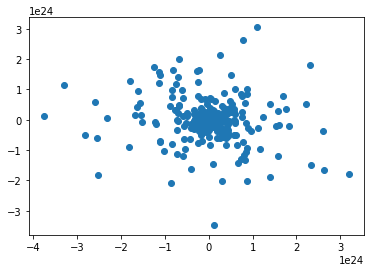

21.91780821917808


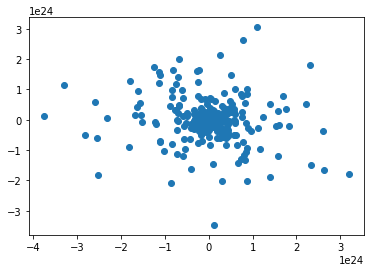

24.65753424657534


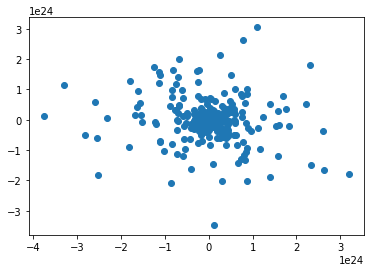

27.397260273972602


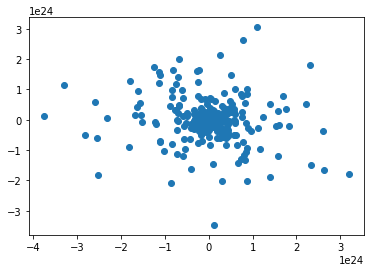

30.136986301369863


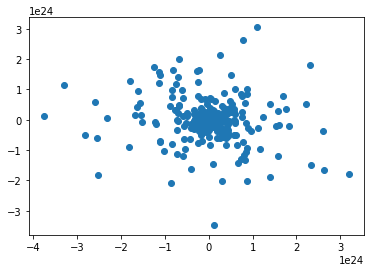

32.87671232876713


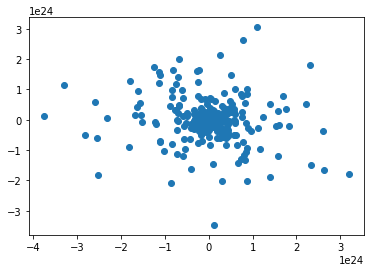

35.61643835616438


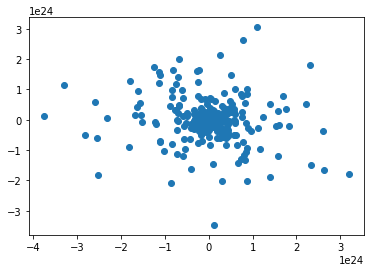

38.35616438356164


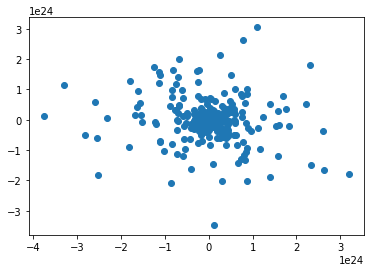

41.0958904109589


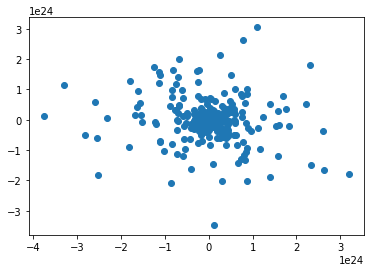

43.83561643835616


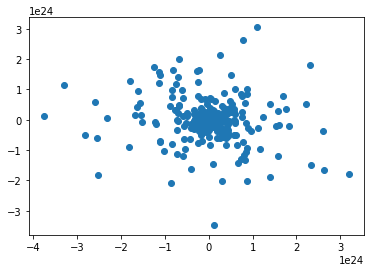

46.57534246575342


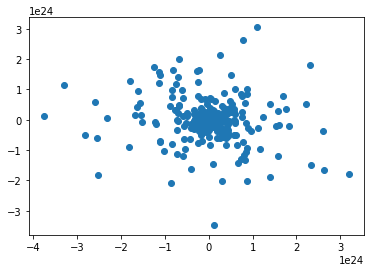

49.31506849315068


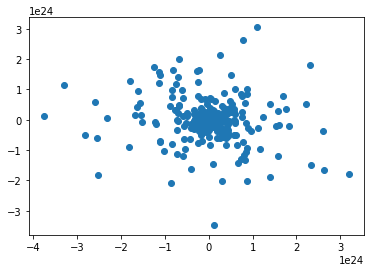

52.054794520547944


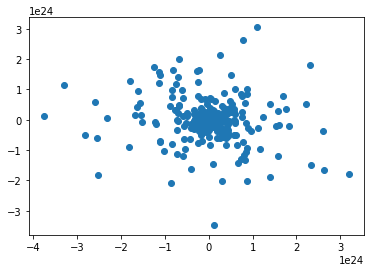

54.794520547945204


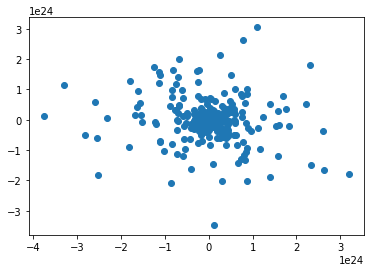

57.534246575342465


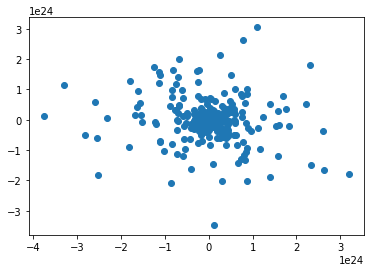

60.273972602739725


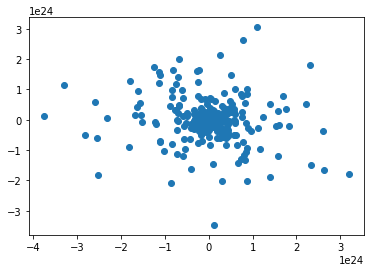

63.013698630136986


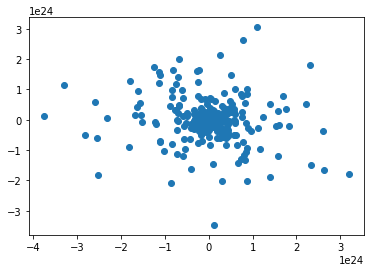

65.75342465753425


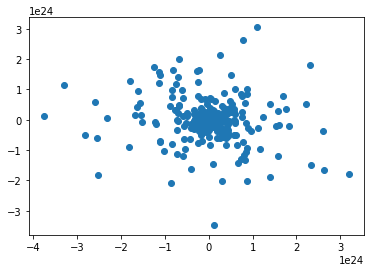

68.4931506849315


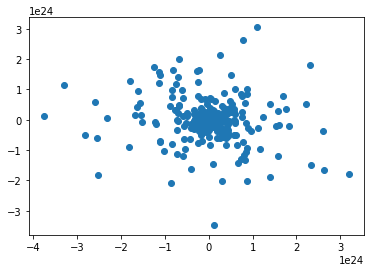

71.23287671232876


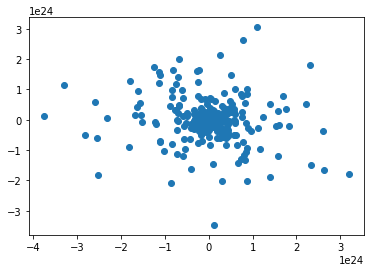

73.97260273972603


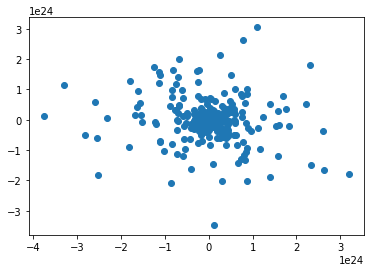

76.71232876712328


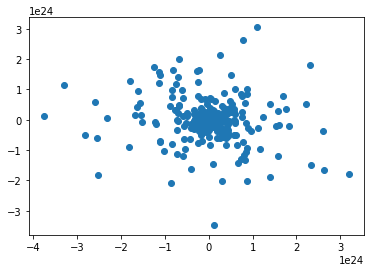

79.45205479452055


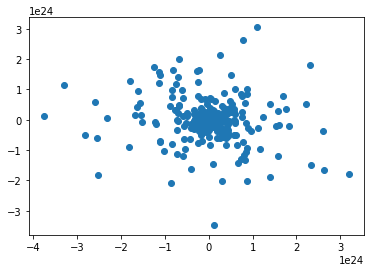

82.1917808219178


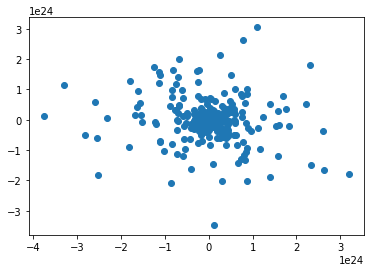

84.93150684931507


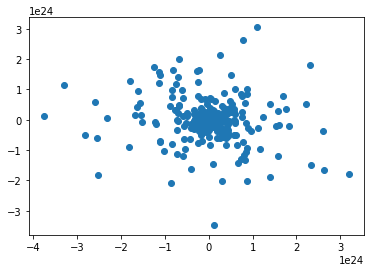

87.67123287671232


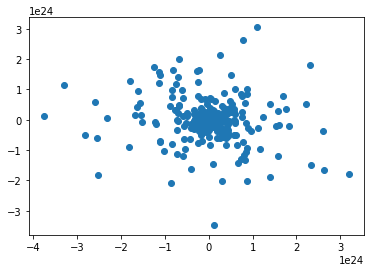

90.41095890410959


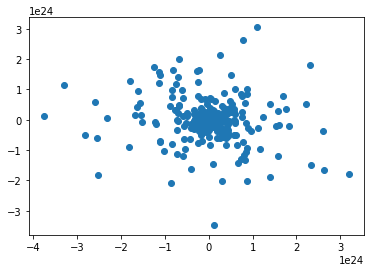

93.15068493150685


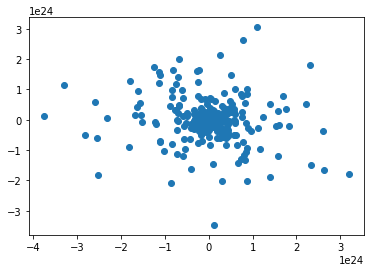

95.89041095890411


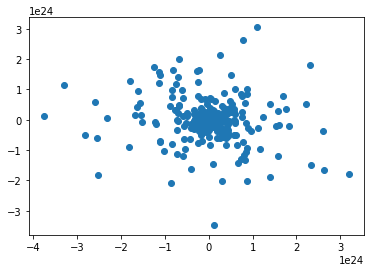

98.63013698630137


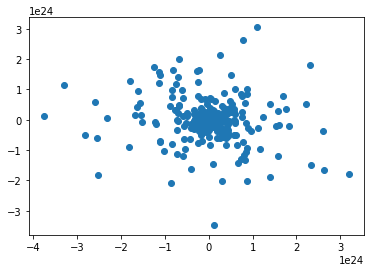

101.36986301369863


In [2]:
while t<=T:
    #Reset coordinate lists to empty for this timestep
    X = []
    Y = []
    Z = []
    for i in range(N):
        ax = 0
        ay = 0
        az = 0
        for j in range(N):
            if i==j:
                break  #Bodies don't gravitationally interact with themselves, so we want to avoid this case, since python will encounter
                       #a 0/0 expression and give an error
            else:
                r = distance(BODIES[i].x, BODIES[j].x, BODIES[i].y, BODIES[j].y, BODIES[i].z, BODIES[j].z)
                ax += -G*BODIES[j].m * (BODIES[i].x - BODIES[j].x)/(r**3) #Using Newton's law to calculate grav. force
                ay += -G*BODIES[j].m * (BODIES[i].y - BODIES[j].y)/(r**3)
                ay += -G*BODIES[j].m * (BODIES[i].z - BODIES[j].z)/(r**3)

        BODIES[i].vx += ax*dt #Numerical approximation of a derivative
        BODIES[i].vy += ay*dt
        BODIES[i].vz += az*dt

        BODIES[i].x += BODIES[i].vx*dt
        BODIES[i].y += BODIES[i].vy*dt
        BODIES[i].z += BODIES[i].vz*dt

        #Append the i-th body's position into the lists
        X.append(BODIES[i].x)
        Y.append(BODIES[i].y)
        Z.append(BODIES[i].z)

    #Plot the position of all bodies in the current timestep
    plt.scatter(X,Y)
    plt.show()

    t+=dt
    print(t*100/T) #Real-time feed on how far the simulation has progressed, given in percentages

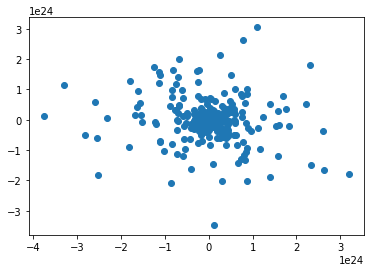

In [3]:
plt.scatter(X,Y)
plt.show()